# 良さそうなサイト
https://syleir.hatenablog.com/entry/2021/12/09/192421

## 自己共分散について

自己共分散（Auto-covariance）は、時間系列データの各時点の値と、その遅延時点（ラグ）の値との間の共分散を測定する統計的指標です。これは、時間的に依存するデータの内部構造やパターンを理解するために重要です。

### 自己共分散の定義
自己共分散は、次のように定義されます。時間系列データ $X_t$ に対して、ラグ $k$ の自己共分散 $\gamma_k$ は次の式で表されます：

$$
\gamma_k = \frac{1}{N-k} \sum_{t=1}^{N-k} (X_t - \mu)(X_{t+k} - \mu)
$$

ここで、
- $X_t$ は時点 $t$ の観測値
- $\mu$ は時間系列データの平均
- $N$ は観測値の総数
- $k$ はラグ（遅延）の数

### 自己共分散の計算ステップ
1. **平均の計算**：時間系列データの平均 $\mu$ を計算します。
2. **共分散の計算**：ラグ $k$ に対する自己共分散を上記の式に従って計算します。

### 自己共分散の用途
- **時系列分析**：時間シリーズデータの自己相関構造を理解するために使用されます。
- **ARIMA モデルの構築**：自己回帰（AR）モデルのパラメータ推定に役立ちます。
- **信号処理**：信号の特性を解析するために使用されます。

### 例：Pythonでの実装
以下に、Pythonを用いて自己共分散を計算する例を示します。

### ステップの詳細説明
1. **データの準備**：サンプルの時間系列データを用意します。
2. **平均の計算**：データの平均を計算します。
3. **自己共分散の計算**：指定したラグ $k$ に対する自己共分散を計算します。
4. **結果の表示**：ラグ0から4までの自己共分散を計算し、表示します。

このように、自己共分散を計算することで、時間系列データの内部構造を解析し、データの依存関係やパターンを明らかにすることができます。

In [2]:
import numpy as np

# サンプル時間系列データ
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

def auto_covariance(X, k):
    N = len(X)
    mean_X = np.mean(X)
    cov = 0
    for t in range(N - k):
        cov += (X[t] - mean_X) * (X[t + k] - mean_X)
    return cov / (N - k)

# ラグ0から4までの自己共分散を計算
for k in range(5):
    print(f"Lag {k}: {auto_covariance(X, k)}")

Lag 0: 8.25
Lag 1: 6.416666666666667
Lag 2: 4.25
Lag 3: 1.75
Lag 4: -1.0833333333333333


## 自己相関係数について

自己相関係数（Autocorrelation Coefficient）は、自己共分散を標準化したもので、時間系列データにおける異なる時点の値の相関関係を測定するための指標です。自己相関係数は、自己共分散を対応する時点の標準偏差で割ることで計算され、$-1$から$1$の範囲を取ります。

### 自己相関係数の定義
自己相関係数 $\rho_k$ は、次のように定義されます。時間系列データ $X_t$ に対して、ラグ $k$ の自己相関係数は次の式で表されます：

$$
\rho_k = \frac{\gamma_k}{\gamma_0}
$$

ここで、
- $\gamma_k$ はラグ $k$ の自己共分散
- $\gamma_0$ はラグ $0$ の自己共分散（つまり、分散）

また、より詳細には以下のように計算されます：

$$
\rho_k = \frac{\sum_{t=1}^{N-k} (X_t - \mu)(X_{t+k} - \mu)}{\sum_{t=1}^{N} (X_t - \mu)^2}
$$

### 自己相関係数の計算ステップ
1. **平均の計算**：時間系列データの平均 $\mu$ を計算します。
2. **自己共分散の計算**：ラグ $k$ の自己共分散 $\gamma_k$ を計算します。
3. **自己相関係数の計算**：ラグ $k$ の自己共分散をラグ $0$ の自己共分散で割って標準化します。

### 自己相関係数の用途
- **時系列分析**：データの自己相関構造を理解し、季節性やトレンドを検出するために使用されます。
- **モデルの構築**：自己回帰モデル（AR）や移動平均モデル（MA）などの時系列モデルの構築に使用されます。
- **信号処理**：信号の特性を解析し、ノイズ除去や予測に利用されます。

### 例：Pythonでの実装
以下に、Pythonを用いて自己相関係数を計算する例を示します。

### ステップの詳細説明
1. **データの準備**：サンプルの時間系列データを用意します。
2. **平均の計算**：データの平均を計算します。
3. **自己共分散の計算**：指定したラグ $k$ に対する自己共分散を計算します。
4. **自己相関係数の計算**：自己共分散を用いて自己相関係数を計算します。
5. **結果の表示**：ラグ0から4までの自己相関係数を計算し、表示します。

このように、自己相関係数を計算することで、時間系列データの相関関係を解析し、データの内部構造やパターンを明らかにすることができます。

In [3]:
import numpy as np
# サンプル時間系列データ
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

def auto_covariance(X, k):
    N = len(X)
    mean_X = np.mean(X)
    cov = 0
    for t in range(N - k):
        cov += (X[t] - mean_X) * (X[t + k] - mean_X)
    return cov / (N - k)

def auto_correlation(X, k):
    gamma_k = auto_covariance(X, k)
    gamma_0 = auto_covariance(X, 0)
    return gamma_k / gamma_0

# ラグ0から4までの自己相関係数を計算
for k in range(5):
    print(f"Lag {k}: {auto_correlation(X, k)}")

Lag 0: 1.0
Lag 1: 0.7777777777777778
Lag 2: 0.5151515151515151
Lag 3: 0.21212121212121213
Lag 4: -0.1313131313131313


## 共分散定常性について

共分散定常性（Covariance Stationarity）とは、時系列データの統計的特性が時間に依存しない性質を指します。具体的には、平均、分散、および共分散が時間に対して一定であることを意味します。共分散定常性を持つ時系列データは、分析やモデリングが比較的簡単になるため、時系列分析において重要な概念です。

### 共分散定常性の定義
ある時系列データ $X_t$ が共分散定常であるためには、以下の条件を満たす必要があります：

1. **平均が一定**：平均 $\mu$ が時間 $t$ に依存しない。
   $$
   E[X_t] = \mu
   $$
   
2. **分散が一定**：各時点の分散が時間 $t$ に依存しない。
   $$
   Var(X_t) = \sigma^2
   $$
   
3. **自己共分散が時間差だけに依存**：任意の時点 $t$ と $t+k$ の自己共分散が時間差 $k$ のみで決まる。
   $$
   Cov(X_t, X_{t+k}) = \gamma_k
   $$

### 共分散定常性の重要性
共分散定常性を持つ時系列データは、以下の理由で解析が容易になります：
- モデリングの簡便化：多くの時系列モデル（ARIMAモデルなど）は、データが共分散定常であることを前提としています。
- 予測の安定性：将来の予測がより安定しやすくなります。
- フィルタリング：ノイズの影響を受けにくくなります。

### 共分散定常性の確認方法
共分散定常性を確認する方法には以下のようなものがあります：
- **グラフの確認**：時間系列データのプロットを見て、平均や分散が一定かを目視で確認します。
- **統計テスト**：単位根検定（例えば、Dickey-Fuller検定）を行い、データが定常であるかを統計的に検証します。

### Pythonによる共分散定常性の確認
以下に、Pythonを用いて共分散定常性を確認する方法を示します。ここでは、Dickey-Fuller検定を使用します。



### ステップの詳細説明
1. **データの生成**：非定常なデータを生成します。ここでは、累積和をとることで非定常な時系列データを作成しています。
2. **データのプロット**：生成したデータをプロットし、視覚的に確認します。
3. **Dickey-Fuller検定の実行**：`adfuller`関数を用いて、データが定常であるかどうかを検定します。
4. **結果の解釈**：p値が0.05より大きい場合、データは非定常と判断されます。

このようにして、共分散定常性を確認することで、時系列データの解析やモデリングの前提条件を満たしているかを検証することができます。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# サンプル時間系列データの生成
np.random.seed(0)
X = np.cumsum(np.random.randn(1000))  # 累積和をとることで非定常なデータを生成

# データのプロット
plt.plot(X)
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Dickey-Fuller検定の実行
result = adfuller(X)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')

# 結果の解釈
if result[1] > 0.05:
    print("データは非定常です。")
else:
    print("データは定常です。")

## ホワイトノイズについて

ホワイトノイズ（White Noise）は、時系列分析や信号処理において重要な概念であり、全ての周波数成分が同じ強度で含まれているランダムな信号を指します。ホワイトノイズは、その性質上、予測が非常に困難であり、次の特徴を持ちます。

### ホワイトノイズの特徴
1. **ゼロ平均**：ホワイトノイズの平均値はゼロです。
   $$
   E[X_t] = 0
   $$

2. **一定分散**：ホワイトノイズの分散は一定で、時間に依存しません。
   $$
   Var(X_t) = \sigma^2
   $$

3. **自己共分散がゼロ**：異なる時点間の自己共分散はゼロです。これは、ホワイトノイズの値が時間にわたって相関しないことを意味します。
   $$
   Cov(X_t, X_{t+k}) = 0 \quad (k \neq 0)
   $$

4. **独立性**：各時点のホワイトノイズの値は統計的に独立であり、相互に依存しません。

### ホワイトノイズの用途
ホワイトノイズは、時系列分析や信号処理の基礎を理解するために重要です。具体的な用途は以下の通りです：
- **モデルの残差分析**：時系列モデルの適合度を評価する際、残差がホワイトノイズに従うかどうかを確認することで、モデルの適切性を判断します。
- **シミュレーション**：ランダム性を持つデータを生成するために使用されます。
- **フィルタリング**：信号処理において、ノイズ除去やフィルタリングの基礎として使用されます。

### Pythonによるホワイトノイズの生成
以下に、Pythonを用いてホワイトノイズを生成し、その特徴を確認する方法を示します。

### ステップの詳細説明
1. **データの生成**：`numpy`を使用して、平均0、標準偏差1の正規分布に従うホワイトノイズを生成します。
2. **データのプロット**：生成したホワイトノイズの時系列データをプロットし、視覚的に確認します。
3. **統計量の計算**：ホワイトノイズの平均と分散を計算し、特徴を確認します。

このようにして、ホワイトノイズの特性を理解し、時系列データや信号処理の解析に役立てることができます。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ホワイトノイズの生成
np.random.seed(0)
white_noise = np.random.normal(0, 1, 1000)  # 平均0、標準偏差1の正規分布から生成

# データのプロット
plt.plot(white_noise)
plt.title('White Noise Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# 平均と分散の計算
mean = np.mean(white_noise)
variance = np.var(white_noise)

print(f"Mean: {mean}")
print(f"Variance: {variance}")

## 自己回帰過程（AR過程）について

自己回帰過程（Autoregressive Process, AR過程）は、時系列データの解析において広く用いられるモデルの一つです。AR過程は、現在の値が過去の値の線形結合によって表されるモデルです。これは、時系列データの内部構造を捉え、将来の予測に役立てることができます。

### 自己回帰過程の定義
自己回帰過程は、次のように定義されます。$p$ 次の自己回帰過程 AR($p$) は、次の式で表されます：

$$
X_t = c + \sum_{i=1}^{p} \phi_i X_{t-i} + \epsilon_t
$$

ここで、
- $X_t$ は時点 $t$ の観測値
- $c$ は定数項（任意）
- $\phi_i$ は自己回帰係数
- $p$ はモデルの次数
- $\epsilon_t$ はホワイトノイズ（平均0、分散 $\sigma^2$ のランダムな誤差項）

### 自己回帰過程の特徴
1. **過去の値に依存**：現在の値が過去の値の線形結合として表される。
2. **モデルの次数**：モデルの次数 $p$ は、何時点までの過去の値を使用するかを示す。
3. **ホワイトノイズ**：誤差項 $\epsilon_t$ はホワイトノイズであり、観測値にランダムな要素を導入する。

### 自己回帰過程の用途
- **時系列データの解析**：データの傾向や周期性を捉える。
- **予測**：将来の値を予測するためのモデルとして使用。
- **フィルタリング**：データの平滑化やノイズ除去に役立つ。

### 例：Pythonでの自己回帰過程のモデル化
以下に、Pythonを用いてARモデルをフィッティングし、将来の値を予測する例を示します。ここでは、`statsmodels`ライブラリを使用します。

### ステップの詳細説明
1. **データの生成**：自己回帰係数 $\phi = 0.8$ のAR(1)プロセスを生成します。誤差項 $\epsilon_t$ は正規分布に従うランダム変数です。
2. **データのプロット**：生成した時系列データをプロットし、視覚的に確認します。
3. **ARモデルのフィッティング**：`AutoReg`クラスを使用して、AR(1)モデルをデータにフィッティングします。
4. **フィッティング結果の表示**：フィッティングしたモデルの係数を表示します。
5. **予測**：フィッティングしたモデルを用いて、将来の値を予測し、予測結果をプロットします。

このようにして、自己回帰過程を用いることで、時系列データの解析や予測を行うことができます。

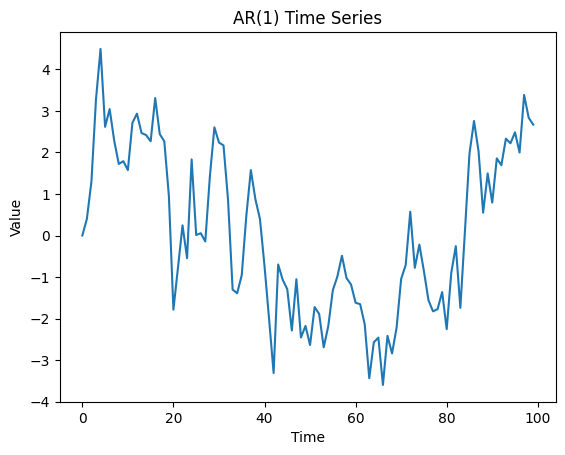

Coefficients: [0.03702077 0.87129564]


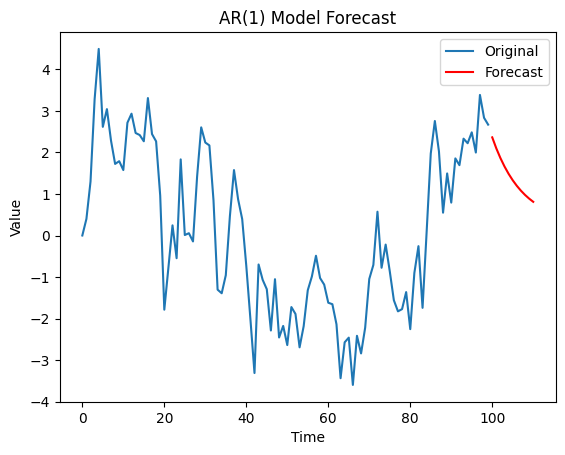

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# サンプル時間系列データの生成（AR(1)プロセス）
np.random.seed(0)
n = 100
phi = 0.8
X = np.zeros(n)
epsilon = np.random.normal(0, 1, n)
for t in range(1, n):
    X[t] = phi * X[t-1] + epsilon[t]

# データのプロット
plt.plot(X)
plt.title('AR(1) Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# ARモデルのフィッティング
model = AutoReg(X, lags=1)
model_fit = model.fit()

# フィッティング結果の表示
print('Coefficients:', model_fit.params)

# 予測
pred = model_fit.predict(start=n, end=n+10)
plt.plot(range(n), X, label='Original')
plt.plot(range(n, n+11), pred, label='Forecast', color='red')
plt.title('AR(1) Model Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

## AR(1)過程の期待値

自己回帰過程AR(1)の期待値を求める方法について説明します。

### AR(1)過程の定義
AR(1)過程は次のように定義されます：

$$
X_t = c + \phi X_{t-1} + \epsilon_t
$$

ここで、
- $X_t$ は時点 $t$ の観測値
- $c$ は定数項
- $\phi$ は自己回帰係数
- $\epsilon_t$ はホワイトノイズであり、平均0、分散 $\sigma^2$ のランダムな誤差項です

### 期待値の計算
AR(1)過程の期待値 $E[X_t]$ を求めるために、まず両辺の期待値を取り、定常状態（期待値が時間に依存しない状態）を考えます。定常状態では $E[X_t] = E[X_{t-1}] = \mu$ となります。

式に期待値を適用すると：

$$
E[X_t] = c + \phi E[X_{t-1}] + E[\epsilon_t]
$$

ホワイトノイズ $\epsilon_t$ の期待値は0なので、$E[\epsilon_t] = 0$ です。このため、上記の式は次のようになります：

$$
E[X_t] = c + \phi E[X_{t-1}]
$$

定常状態では $E[X_t] = E[X_{t-1}] = \mu$ であるため、次の式が成り立ちます：

$$
\mu = c + \phi \mu
$$

これを $\mu$ について解くと：

$$
\mu - \phi \mu = c
$$

$$
\mu (1 - \phi) = c
$$

$$
\mu = \frac{c}{1 - \phi}
$$

したがって、AR(1)過程の期待値は次のようになります：

$$
E[X_t] = \frac{c}{1 - \phi}
$$

### まとめ
AR(1)過程の期待値は、定数項 $c$ と自己回帰係数 $\phi$ を用いて次のように求められます：

$$
E[X_t] = \frac{c}{1 - \phi}
$$

この期待値は、過程が定常状態にあると仮定した場合の結果です。

## 移動平均過程（MA過程）について

移動平均過程（Moving Average Process, MA過程）は、時系列データの解析でよく使われるモデルの一つです。MA過程は、現在の観測値が過去の誤差項（ノイズ）の線形結合で表されるモデルです。

### 移動平均過程の定義
$p$ 次の移動平均過程 MA($q$) は、次のように定義されます：

$$
X_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q}
$$

ここで、
- $X_t$ は時点 $t$ の観測値
- $\mu$ は定常平均
- $\epsilon_t$ はホワイトノイズ（平均0、分散 $\sigma^2$ のランダムな誤差項）
- $\theta_i$ はモデルの係数
- $q$ はモデルの次数

### 移動平均過程の特徴
1. **過去の誤差に依存**：現在の値が過去の誤差項の線形結合として表される。
2. **有限な過去の影響**：現在の値に影響を与えるのは有限個の過去の誤差項（次数 $q$ まで）である。
3. **ホワイトノイズ**：誤差項 $\epsilon_t$ はホワイトノイズであり、観測値にランダムな要素を導入する。

### 移動平均過程の用途
- **時系列データの解析**：データの傾向や周期性を捉える。
- **予測**：将来の値を予測するためのモデルとして使用。
- **フィルタリング**：データの平滑化やノイズ除去に役立つ。

### 例：Pythonでの移動平均過程のモデル化
以下に、Pythonを用いてMAモデルをフィッティングし、将来の値を予測する例を示します。ここでは、`statsmodels`ライブラリを使用します。



### ステップの詳細説明
1. **データの生成**：移動平均係数 $\theta = 0.8$ のMA(1)プロセスを生成します。誤差項 $\epsilon_t$ は正規分布に従うランダム変数です。
2. **データのプロット**：生成した時系列データをプロットし、視覚的に確認します。
3. **MAモデルのフィッティング**：`ARIMA`クラスを使用して、MA(1)モデルをデータにフィッティングします（ARIMAの順序 $(0, 0, 1)$ はMA(1)を表します）。
4. **フィッティング結果の表示**：フィッティングしたモデルの係数を表示します。
5. **予測**：フィッティングしたモデルを用いて、将来の値を予測し、予測結果をプロットします。

このようにして、移動平均過程を用いることで、時系列データの解析や予測を行うことができます。

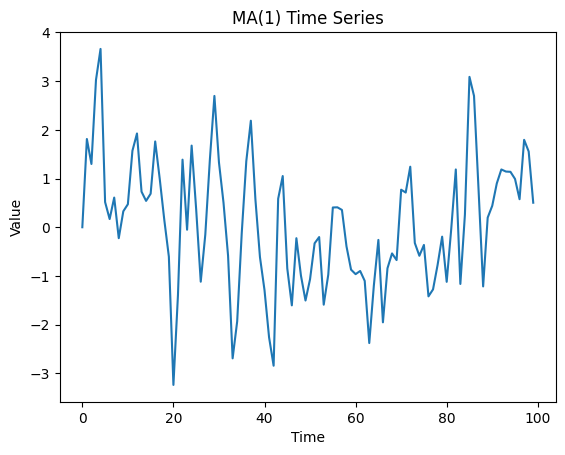

Coefficients: [0.0814947  0.79483763 1.0090995 ]


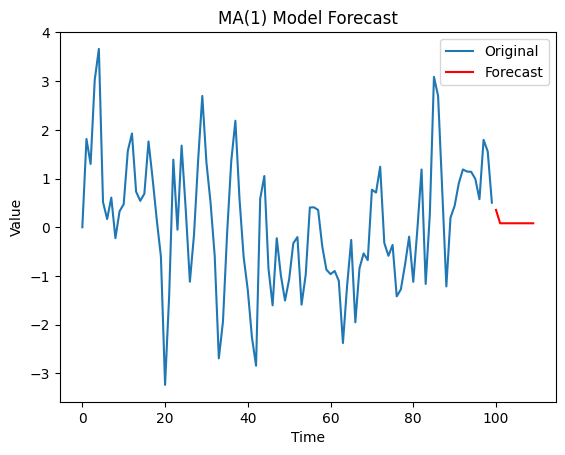

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# サンプル時間系列データの生成（MA(1)プロセス）
np.random.seed(0)
n = 100
theta = 0.8
epsilon = np.random.normal(0, 1, n)
X = np.zeros(n)
for t in range(1, n):
    X[t] = epsilon[t] + theta * epsilon[t-1]

# データのプロット
plt.plot(X)
plt.title('MA(1) Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# MAモデルのフィッティング
model = ARIMA(X, order=(0, 0, 1))
model_fit = model.fit()

# フィッティング結果の表示
print('Coefficients:', model_fit.params)

# 予測
pred = model_fit.forecast(steps=10)
plt.plot(range(n), X, label='Original')
plt.plot(range(n, n+10), pred, label='Forecast', color='red')
plt.title('MA(1) Model Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

## 自己回帰和分移動平均過程（ARIMAモデル）について

自己回帰和分移動平均過程（Autoregressive Integrated Moving Average Process, ARIMA）は、自己回帰（AR）、差分（I）、および移動平均（MA）を組み合わせた時系列モデルです。ARIMAモデルは、非定常な時系列データを分析および予測するために使用されます。

### ARIMAモデルの定義
ARIMAモデルは、次のように定義されます：

$$
ARIMA(p, d, q)
$$

ここで、
- $p$：自己回帰（AR）項の数
- $d$：差分（I）を取る回数
- $q$：移動平均（MA）項の数

### ARIMAモデルの構成要素
1. **自己回帰 (AR) 部分**：過去の値を用いて現在の値を説明する部分。
   $$ X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \cdots + \phi_p X_{t-p} + \epsilon_t $$

2. **差分 (I) 部分**：非定常な時系列データを定常にするために差分を取る部分。
   $$ Y_t = X_t - X_{t-1} $$
   差分を$d$回取ったデータをモデル化します。

3. **移動平均 (MA) 部分**：過去の誤差項を用いて現在の値を説明する部分。
   $$ X_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q} $$

### ARIMAモデルの用途
- **予測**：将来の値を予測するために使用されます。
- **データの解析**：データのトレンドや季節性を捉えるために使用されます。
- **経済・金融分析**：株価や経済指標の予測に広く使用されます。

### 例：PythonでのARIMAモデルの実装
以下に、Pythonを用いてARIMAモデルをフィッティングし、将来の値を予測する例を示します。ここでは、`statsmodels`ライブラリを使用します。


### ステップの詳細説明
1. **データの生成**：ARIMA(1,1,1)プロセスに従うサンプルデータを生成します。
2. **差分を取る**：非定常データを定常にするために、一次差分を取ります。
3. **データのプロット**：差分を取ったデータをプロットし、視覚的に確認します。
4. **ARIMAモデルのフィッティング**：`ARIMA`クラスを使用して、差分データにARIMA(1,0,1)モデルをフィッティングします（差分を取っているため、Iの部分は0とします）。
5. **フィッティング結果の表示**：フィッティングしたモデルの係数を表示します。
6. **予測**：フィッティングしたモデルを用いて、将来の値を予測し、予測結果をプロットします。

このように、ARIMAモデルを用いることで、非定常な時系列データの解析や予測を行うことができます。

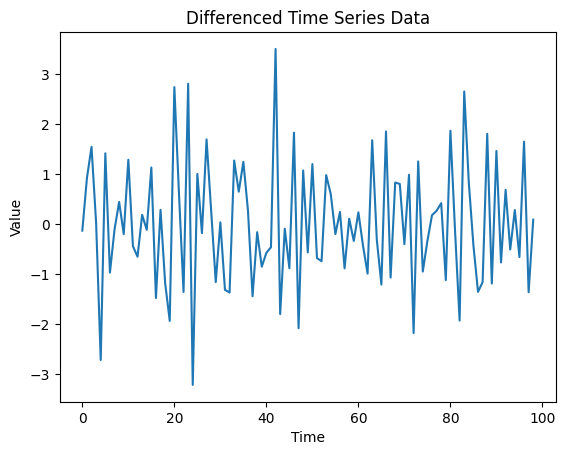

Coefficients: [ 2.02486775e-04  1.45935816e-01 -8.91785125e-01  9.77289991e-01]


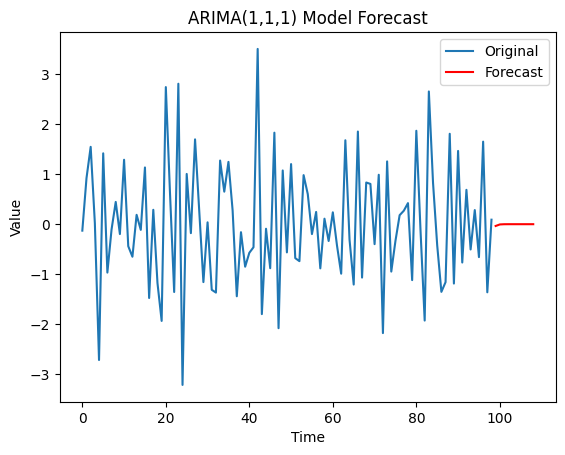

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# サンプル時間系列データの生成（ARIMA(1,1,1)プロセス）
np.random.seed(0)
n = 100
X = np.zeros(n)
epsilon = np.random.normal(0, 1, n)
for t in range(1, n):
    X[t] = 0.5 * X[t-1] + epsilon[t] - 0.3 * epsilon[t-1]

# 差分を取る
X_diff = np.diff(X)

# データのプロット
plt.plot(X_diff)
plt.title('Differenced Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# ARIMAモデルのフィッティング
model = ARIMA(X_diff, order=(1, 0, 1))
model_fit = model.fit()

# フィッティング結果の表示
print('Coefficients:', model_fit.params)

# 予測
pred = model_fit.forecast(steps=10)
plt.plot(range(len(X_diff)), X_diff, label='Original')
plt.plot(range(len(X_diff), len(X_diff)+10), pred, label='Forecast', color='red')
plt.title('ARIMA(1,1,1) Model Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

## ディッキー・フラー検定について

ディッキー・フラー検定（Dickey-Fuller Test）は、時系列データが単位根を持つかどうか、すなわち非定常であるかどうかを検定するための統計的手法です。単位根が存在する場合、時系列データは時間の経過とともに一定の平均や分散を持たず、トレンドを持ちます。ディッキー・フラー検定は、この単位根の存在を検証し、データが定常か非定常かを判断するために用いられます。

### ディッキー・フラー検定の目的
ディッキー・フラー検定の主な目的は、時系列データが単位根を持つかどうかを確認することです。単位根が存在する場合、データは非定常と見なされます。非定常なデータは、特定のモデル（例えば、ARIMAモデル）の適用に適さない場合があるため、検定を行ってデータの特性を理解することが重要です。

### 検定の方法
ディッキー・フラー検定は、以下の帰無仮説と対立仮説を検証します：
- 帰無仮説（$H_0$）：データは単位根を持つ（非定常）。
- 対立仮説（$H_1$）：データは単位根を持たない（定常）。

検定は次の回帰モデルに基づいて行われます：

$$
\Delta X_t = \alpha + \beta t + \gamma X_{t-1} + \delta \Delta X_{t-1} + \cdots + \epsilon_t
$$

ここで、
- $\Delta X_t = X_t - X_{t-1}$ は時系列データの一次差分
- $\alpha$ は定数項
- $\beta t$ はトレンド項
- $\gamma$ は単位根の係数
- $\delta$ はラグ付き差分項の係数
- $\epsilon_t$ は誤差項

### ディッキー・フラー検定の結果の解釈
- **p値**：p値が0.05未満の場合、帰無仮説を棄却し、データは定常であると判断します。
- **検定統計量**：検定統計量が臨界値よりも小さい場合、帰無仮説を棄却します。

### Pythonによるディッキー・フラー検定の実行
以下に、Pythonを用いてディッキー・フラー検定を実行する例を示します。ここでは、`statsmodels`ライブラリを使用します。



### ステップの詳細説明
1. **データの生成**：非定常なデータを生成します。ここでは、累積和を取ることで非定常な時系列データを作成しています。
2. **データのプロット**：生成したデータをプロットし、視覚的に確認します。
3. **ディッキー・フラー検定の実行**：`adfuller`関数を用いて、データが定常であるかどうかを検定します。
4. **結果の解釈**：p値と検定統計量を確認し、データが定常であるか非定常であるかを判断します。

このように、ディッキー・フラー検定を使用することで、時系列データの定常性を確認し、適切なモデルを選択するための基礎情報を得ることができます。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# サンプル時間系列データの生成（非定常データ）
np.random.seed(0)
X = np.cumsum(np.random.randn(1000))  # 累積和をとることで非定常なデータを生成

# データのプロット
plt.plot(X)
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# ディッキー・フラー検定の実行
result = adfuller(X)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')

# 結果の解釈
if result[1] > 0.05:
    print("データは非定常です。")
else:
    print("データは定常です。")

## ラグ多項式について

ラグ多項式（Lag Polynomial）は、時系列分析において重要な役割を果たす概念で、自己回帰モデル（AR）、移動平均モデル（MA）、およびそれらの組み合わせであるARMAモデルなどで使用されます。ラグ多項式は、時系列データの遅延値（ラグ）を多項式形式で表現したものです。

### ラグオペレーター
ラグオペレーター（Lag Operator）$L$は、時系列データのラグ（遅延）を表すために使用されます。具体的には、$L$を用いて次のように表現します：

$$
L X_t = X_{t-1}
$$

一般に、$L^k X_t$ は時系列データ $X_t$ を $k$ 期遅延させたもの、すなわち $X_{t-k}$ を表します。

### ラグ多項式の定義
ラグ多項式は、ラグオペレーターを用いて次のように表されます。例えば、次数 $p$ のラグ多項式 $\phi(L)$ は次の形式を持ちます：

$$
\phi(L) = 1 - \phi_1 L - \phi_2 L^2 - \cdots - \phi_p L^p
$$

ここで、$\phi_1, \phi_2, \ldots, \phi_p$ は自己回帰係数です。

### ARモデルのラグ多項式
AR($p$)モデルは、次のように表されます：

$$
X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \cdots + \phi_p X_{t-p} + \epsilon_t
$$

これをラグ多項式を用いて表現すると、次のようになります：

$$
\phi(L) X_t = c + \epsilon_t
$$

ここで、$\phi(L) = 1 - \phi_1 L - \phi_2 L^2 - \cdots - \phi_p L^p$ です。

### MAモデルのラグ多項式
MA($q$)モデルは、次のように表されます：

$$
X_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q}
$$

これをラグ多項式を用いて表現すると、次のようになります：

$$
X_t = \mu + \theta(L) \epsilon_t
$$

ここで、$\theta(L) = 1 + \theta_1 L + \theta_2 L^2 + \cdots + \theta_q L^q$ です。

### ARMAモデルのラグ多項式
ARMA($p, q$)モデルは、ARモデルとMAモデルの組み合わせです。次のように表されます：

$$
X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \cdots + \phi_p X_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q}
$$

これをラグ多項式を用いて表現すると、次のようになります：

$$
\phi(L) X_t = c + \theta(L) \epsilon_t
$$

### ラグ多項式の用途
- **時系列モデリング**：自己回帰（AR）、移動平均（MA）、およびそれらの組み合わせであるARMA、ARIMAモデルなどの構築に使用されます。
- **解析と予測**：ラグ多項式を用いることで、時系列データの依存関係を明示的にモデル化し、将来の値を予測します。
- **フィルタリング**：時系列データの平滑化やノイズ除去に役立ちます。

### 例：Pythonによるラグ多項式の使用
以下に、Pythonを用いてAR(2)モデルをラグ多項式形式で表現する例を示します。



このコードでは、AR(2)モデルに従う時系列データを生成し、ラグ多項式形式で表現し、ARIMAモデルを用いてデータにフィッティングしています。フィッティング結果として、モデルの係数を表示しています。

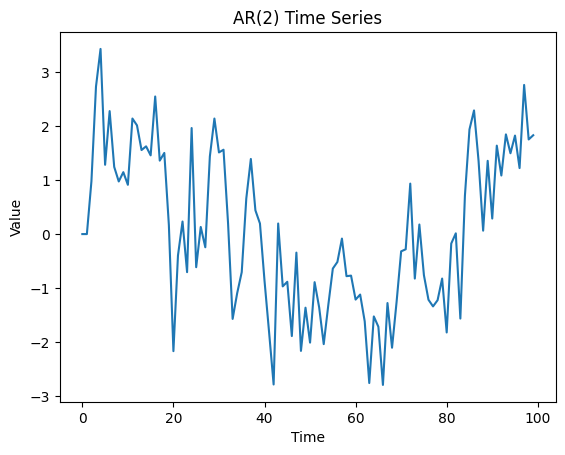

Coefficients: [0.14636216 0.53484767 0.2510062  0.96890217]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# サンプル時間系列データの生成（AR(2)プロセス）
np.random.seed(0)
n = 100
phi1 = 0.5
phi2 = 0.2
epsilon = np.random.normal(0, 1, n)
X = np.zeros(n)
for t in range(2, n):
    X[t] = phi1 * X[t-1] + phi2 * X[t-2] + epsilon[t]

# データのプロット
plt.plot(X)
plt.title('AR(2) Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# AR(2)モデルのフィッティング
model = ARIMA(X, order=(2, 0, 0))
model_fit = model.fit()

# フィッティング結果の表示
print('Coefficients:', model_fit.params)

## コレログラムと偏自己相関係数について

時系列データの解析において、コレログラムと偏自己相関係数（PACF）は重要なツールです。これらは、データの自己相関構造を理解し、適切な時系列モデルを選択するために使用されます。

### コレログラム（Correlogram）

コレログラムは、自己相関関数（ACF: Autocorrelation Function）を視覚化したものです。自己相関関数は、時間遅れ（ラグ）に対する自己相関係数を計算し、データの自己相関構造を示します。

#### 自己相関関数（ACF）の定義
自己相関関数 $ \rho_k $ は、ラグ $ k $ に対する自己相関係数を示し、次のように定義されます：

$$
\rho_k = \frac{\sum_{t=1}^{N-k} (X_t - \mu)(X_{t+k} - \mu)}{\sum_{t=1}^{N} (X_t - \mu)^2}
$$

ここで、$ X_t $ は時点 $ t $ のデータポイント、$ \mu $ はデータの平均、$ N $ はデータポイントの総数です。

### 偏自己相関係数（PACF）

偏自己相関係数は、あるラグにおける自己相関を他のすべての中間ラグの影響を取り除いた上で測定するものです。これにより、特定のラグにおける純粋な自己相関を把握できます。

#### 偏自己相関関数（PACF）の定義
偏自己相関関数 $ \alpha_k $ は、ラグ $ k $ に対する偏自己相関係数を示し、次のように定義されます：

$$
\alpha_k = \text{corr}(X_t, X_{t-k} \mid X_{t-1}, X_{t-2}, \ldots, X_{t-k+1})
$$

これは、$ X_t $ と $ X_{t-k} $ の間の相関を、間にある全てのラグの影響を除去した上で計算したものです。

### コレログラムとPACFの用途

1. **モデル選択**：ACFとPACFを使うことで、データに適したモデル（AR、MA、ARMA、ARIMAなど）を選択するのに役立ちます。
   - **ARモデル**：PACFが特定のラグで急激に減衰する場合。
   - **MAモデル**：ACFが特定のラグで急激に減衰する場合。
   - **ARMAモデル**：両方のパターンが見られる場合。

2. **データの解析**：時系列データの自己相関構造を理解し、トレンドや周期性を検出するのに役立ちます。

### 例：PythonによるコレログラムとPACFのプロット
以下に、Pythonを用いてコレログラムと偏自己相関係数をプロットする例を示します。ここでは、`statsmodels`ライブラリを使用します。


### ステップの詳細説明
1. **データの生成**：AR(2)プロセスに従う時系列データを生成します。
2. **データのプロット**：生成した時系列データをプロットし、視覚的に確認します。
3. **コレログラムのプロット**：`plot_acf`関数を使用して、自己相関関数（ACF）をプロットします。
4. **偏自己相関関数のプロット**：`plot_pacf`関数を使用して、偏自己相関関数（PACF）をプロットします。

これにより、時系列データの自己相関構造を視覚的に確認し、適切なモデルの選択やデータの解析に役立てることができます。

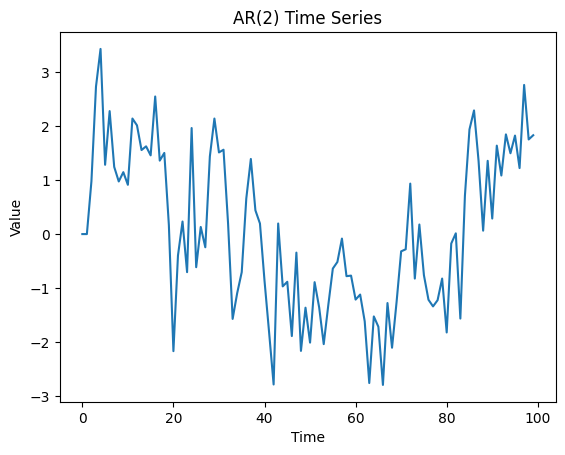

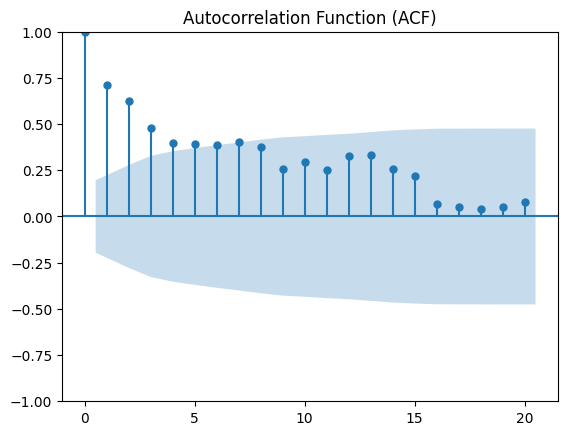

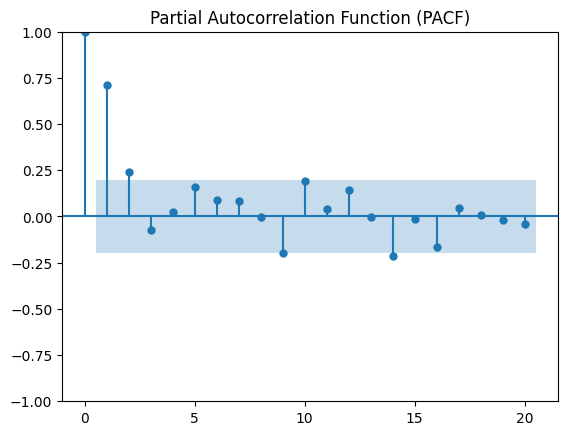

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# サンプル時間系列データの生成（AR(2)プロセス）
np.random.seed(0)
n = 100
phi1 = 0.5
phi2 = 0.2
epsilon = np.random.normal(0, 1, n)
X = np.zeros(n)
for t in range(2, n):
    X[t] = phi1 * X[t-1] + phi2 * X[t-2] + epsilon[t]

# データのプロット
plt.plot(X)
plt.title('AR(2) Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# コレログラムのプロット
plot_acf(X, lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# 偏自己相関関数のプロット
plot_pacf(X, lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

## スペクトラムについて

スペクトラム（Spectrum）は、時系列データや信号を周波数成分に分解して、その周波数ごとのエネルギーや強度を示すものです。スペクトラム解析は、信号処理や時系列解析の重要なツールであり、データの周期性や隠れた構造を理解するのに役立ちます。

### スペクトラムの基本概念

1. **時間領域と周波数領域**：時系列データは時間領域の信号として表されますが、フーリエ変換を用いて周波数領域に変換することで、信号を構成する周波数成分を分析できます。

2. **フーリエ変換**：フーリエ変換は、時間領域の信号を周波数領域に変換する数学的手法です。離散フーリエ変換（DFT）は、特にデジタルデータに対して適用されます。

   $$ X(f) = \sum_{t=0}^{N-1} x_t \cdot e^{-i 2 \pi f t / N} $$

   ここで、$ X(f) $ は周波数 $ f $ における信号のフーリエ変換、$ x_t $ は時点 $ t $ における信号、$ N $ はデータポイントの総数です。

3. **パワースペクトル**：パワースペクトルは、各周波数成分のエネルギー（パワー）を示すもので、フーリエ変換の絶対値の二乗で表されます。

   $$ P(f) = |X(f)|^2 $$

### スペクトル解析の用途

- **周期性の検出**：信号中の繰り返しパターンや周期を見つける。
- **信号の特性解析**：信号の周波数特性を理解し、フィルタリングやモデリングに役立てる。
- **異常検知**：特定の周波数成分が異常に強い場合など、異常なパターンを検出する。

### 例：Pythonによるスペクトル解析

以下に、Pythonを用いて時系列データのスペクトル解析を行う例を示します。ここでは、`numpy`および`matplotlib`ライブラリを使用します。



### ステップの詳細説明

1. **データの生成**：2つの異なる周波数成分を持つサンプル信号を生成します。ここでは、5Hzと20Hzの正弦波を混合し、ランダムノイズを加えた信号を作成しています。
2. **データのプロット**：生成した時系列データをプロットし、視覚的に確認します。
3. **フーリエ変換**：`np.fft.fft`関数を使用して、時系列データのフーリエ変換を行い、周波数成分を求めます。
4. **パワースペクトルの計算**：フーリエ変換の結果の絶対値を二乗し、パワースペクトルを計算します。
5. **スペクトルのプロット**：周波数成分ごとのパワーをプロットし、信号のスペクトルを視覚的に確認します。

このように、スペクトル解析を行うことで、時系列データや信号の周波数特性を分析し、周期性や重要な周波数成分を検出することができます。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# サンプル時間系列データの生成（周期性を持つ信号）
np.random.seed(0)
n = 500
t = np.linspace(0, 1, n)
freq1 = 5  # 周波数1
freq2 = 20  # 周波数2
X = np.sin(2 * np.pi * freq1 * t) + 0.5 * np.sin(2 * np.pi * freq2 * t) + 0.2 * np.random.randn(n)

# データのプロット
plt.plot(t, X)
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# フーリエ変換
X_fft = np.fft.fft(X)
frequencies = np.fft.fftfreq(n, d=t[1] - t[0])

# パワースペクトルの計算
power_spectrum = np.abs(X_fft) ** 2

# スペクトルのプロット
plt.plot(frequencies[:n//2], power_spectrum[:n//2])
plt.title('Power Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

## ペリオドグラムについて

ペリオドグラム（Periodogram）は、時系列データの周波数成分を分析するための手法で、信号のパワースペクトル密度（Power Spectral Density, PSD）を推定するものです。ペリオドグラムは、特にデータに含まれる周期性や振動を特定するために使用されます。

### ペリオドグラムの基本概念

1. **周波数領域の分析**：ペリオドグラムは、時系列データを周波数領域で解析し、各周波数成分の強度を示します。これは、信号の振幅を時間の関数としてではなく、周波数の関数として表現することを意味します。

2. **離散フーリエ変換（DFT）**：ペリオドグラムの計算には、通常、データの離散フーリエ変換（DFT）を用います。DFTは、時系列データをその周波数成分に分解する数学的手法です。

3. **パワースペクトル密度（PSD）**：ペリオドグラムは、DFTの絶対値の二乗を取り、各周波数成分のエネルギー（パワー）を示すものです。

   $$ P(f) = \frac{1}{N} |X(f)|^2 $$

   ここで、$ P(f) $ は周波数 $ f $ におけるパワースペクトル、$ X(f) $ はフーリエ変換の結果、$ N $ はデータポイントの総数です。

### ペリオドグラムの用途

- **周期性の検出**：信号に含まれる周期成分や繰り返しパターンを検出します。
- **信号の特性解析**：信号の周波数特性を理解し、重要な周波数成分を特定します。
- **異常検知**：特定の周波数で異常に高いエネルギーを持つ場合など、異常なパターンを検出します。

### 例：Pythonによるペリオドグラムの計算とプロット

以下に、Pythonを用いてペリオドグラムを計算し、プロットする例を示します。ここでは、`scipy`および`matplotlib`ライブラリを使用します。



### ステップの詳細説明

1. **データの生成**：5Hzと20Hzの周波数成分を持つサンプル信号を生成します。信号にはランダムノイズも加えています。
2. **データのプロット**：生成した時系列データをプロットし、視覚的に確認します。
3. **ペリオドグラムの計算**：`scipy.signal.periodogram`関数を使用して、ペリオドグラムを計算します。ここで、`fs`はサンプリング周波数を指定します。
4. **ペリオドグラムのプロット**：計算したペリオドグラムをプロットし、信号の周波数成分とその強度を視覚的に確認します。

このようにして、ペリオドグラムを用いることで、時系列データや信号の周波数特性を分析し、周期性や重要な周波数成分を特定することができます。

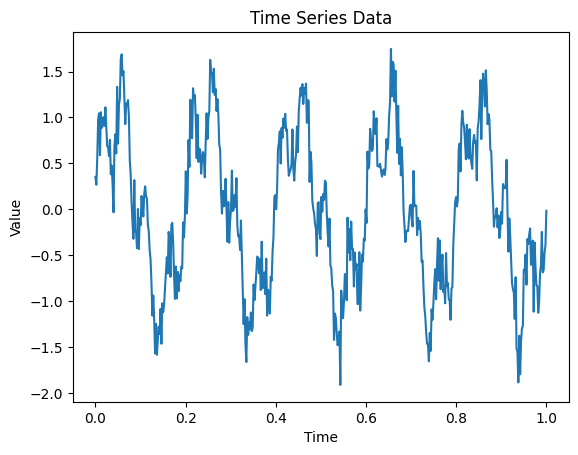

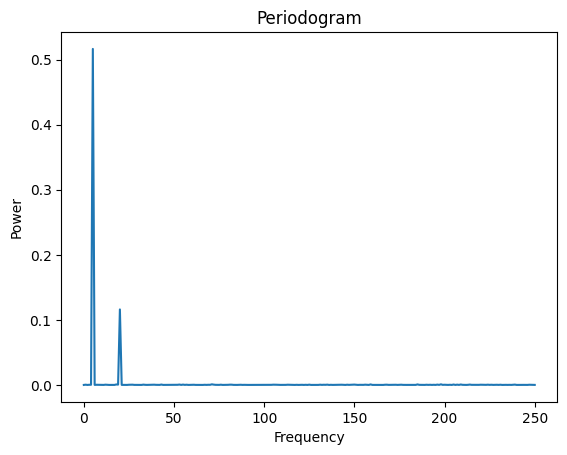

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram

# サンプル時間系列データの生成（周期性を持つ信号）
np.random.seed(0)
n = 500
t = np.linspace(0, 1, n)
freq1 = 5  # 周波数1
freq2 = 20  # 周波数2
X = np.sin(2 * np.pi * freq1 * t) + 0.5 * np.sin(2 * np.pi * freq2 * t) + 0.2 * np.random.randn(n)

# データのプロット
plt.plot(t, X)
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# ペリオドグラムの計算
frequencies, power_spectrum = periodogram(X, fs=n)

# ペリオドグラムのプロット
plt.plot(frequencies, power_spectrum)
plt.title('Periodogram')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

## 状態空間モデルについて

状態空間モデル（State Space Model）は、観測データとシステムの内部状態を結びつけるための統計モデルであり、特に時系列データの解析において強力なツールです。状態空間モデルは、システムの動的な特性をモデル化し、予測やフィルタリング、スムージングに役立ちます。

### 状態空間モデルの基本構造

状態空間モデルは、以下の2つの主要な方程式から構成されます：

1. **状態方程式（State Equation）**：システムの内部状態の進化を記述します。
   $$
   \mathbf{x}_t = \mathbf{F}_t \mathbf{x}_{t-1} + \mathbf{G}_t \mathbf{u}_t + \mathbf{w}_t
   $$
   ここで、
   - $\mathbf{x}_t$ は時点 $t$ の状態ベクトル
   - $\mathbf{F}_t$ は状態遷移行列
   - $\mathbf{u}_t$ は制御入力ベクトル（任意）
   - $\mathbf{G}_t$ は制御入力行列（任意）
   - $\mathbf{w}_t$ は状態ノイズ（平均0、分散$\mathbf{Q}_t$）

2. **観測方程式（Observation Equation）**：観測データと内部状態の関係を記述します。
   $$
   \mathbf{y}_t = \mathbf{H}_t \mathbf{x}_t + \mathbf{v}_t
   $$
   ここで、
   - $\mathbf{y}_t$ は時点 $t$ の観測ベクトル
   - $\mathbf{H}_t$ は観測行列
   - $\mathbf{v}_t$ は観測ノイズ（平均0、分散$\mathbf{R}_t$）

### 状態空間モデルの用途

- **時系列データの解析**：トレンドや季節性を捉えるためのモデル化。
- **フィルタリング**：ノイズの多いデータから真の信号を抽出するために使用。
- **予測**：将来のデータポイントを予測。
- **システムの制御と監視**：システムの状態を推定し、制御するために使用。

### カルマンフィルタ

カルマンフィルタは、状態空間モデルに基づくフィルタリング手法の一つで、線形ガウスモデルの場合に最適な状態推定を提供します。カルマンフィルタは以下の手順で動作します：

1. **予測ステップ**：次の時刻の状態を予測。
   $$
   \hat{\mathbf{x}}_{t|t-1} = \mathbf{F}_t \hat{\mathbf{x}}_{t-1|t-1}
   $$
   $$
   \mathbf{P}_{t|t-1} = \mathbf{F}_t \mathbf{P}_{t-1|t-1} \mathbf{F}_t^T + \mathbf{Q}_t
   $$

2. **更新ステップ**：観測データを用いて予測を更新。
   $$
   \mathbf{K}_t = \mathbf{P}_{t|t-1} \mathbf{H}_t^T (\mathbf{H}_t \mathbf{P}_{t|t-1} \mathbf{H}_t^T + \mathbf{R}_t)^{-1}
   $$
   $$
   \hat{\mathbf{x}}_{t|t} = \hat{\mathbf{x}}_{t|t-1} + \mathbf{K}_t (\mathbf{y}_t - \mathbf{H}_t \hat{\mathbf{x}}_{t|t-1})
   $$
   $$
   \mathbf{P}_{t|t} = (\mathbf{I} - \mathbf{K}_t \mathbf{H}_t) \mathbf{P}_{t|t-1}
   $$

### 例：Pythonによる状態空間モデルの実装

以下に、Pythonを用いて簡単な状態空間モデルを構築し、カルマンフィルタを適用する例を示します。ここでは、`statsmodels`ライブラリを使用します。



### ステップの詳細説明

1. **データの生成**：ランダムウォークとノイズからなるサンプルデータを生成します。
2. **データのプロット**：生成した真の状態と観測値をプロットします。
3. **状態空間モデルの定義**：`UnobservedComponents`クラスを使用して、局所レベルモデルを定義します。
4. **カルマンフィルタの適用**：モデルに対してカルマンフィルタを適用し、状態を推定します。
5. **推定結果のプロット**：推定された状態をプロットし、真の状態と観測値と比較します。

このようにして、状態空間モデルを用いることで、時系列データのフィルタリングや予測、ノイズ除去を行うことができます。

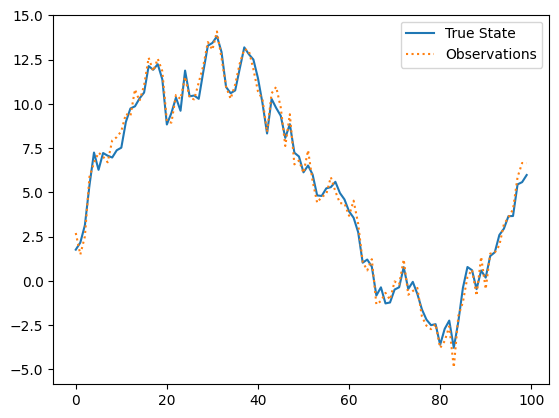

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.54839D+00    |proj g|=  1.73797D-01

At iterate    5    f=  1.61495D+00    |proj g|=  5.18311D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     12      1     0     0   2.768D-06   1.615D+00
  F =   1.6149541687601956     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


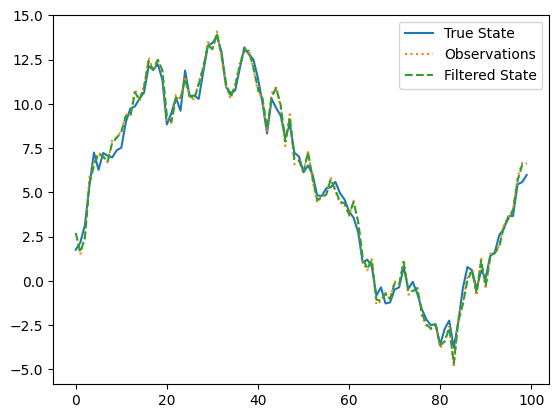

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.kalman_filter import KalmanFilter
from statsmodels.tsa.statespace.structural import UnobservedComponents

# サンプルデータの生成（ランダムウォーク + ノイズ）
np.random.seed(0)
n = 100
true_state = np.cumsum(np.random.normal(0, 1, n))
observations = true_state + np.random.normal(0, 0.5, n)

# データのプロット
plt.plot(true_state, label='True State')
plt.plot(observations, label='Observations', linestyle='dotted')
plt.legend()
plt.show()

# 状態空間モデルの定義
model = UnobservedComponents(observations, level='local level')

# カルマンフィルタの適用
result = model.fit()

# 推定された状態の取得
filtered_state = result.filtered_state[0]

# 推定結果のプロット
plt.plot(true_state, label='True State')
plt.plot(observations, label='Observations', linestyle='dotted')
plt.plot(filtered_state, label='Filtered State', linestyle='dashed')
plt.legend()
plt.show()

## ダービン・ワトソン検定について

ダービン・ワトソン検定（Durbin-Watson Test）は、回帰分析の残差に自己相関が存在するかどうかを検定する統計的方法です。自己相関が存在する場合、回帰モデルの仮定が満たされず、モデルの推定結果が信頼できない可能性があります。この検定は特に時系列データの回帰分析において重要です。

### ダービン・ワトソン検定統計量の定義

ダービン・ワトソン検定統計量 $d$ は次のように定義されます：

$$
d = \frac{\sum_{t=2}^{N} (e_t - e_{t-1})^2}{\sum_{t=1}^{N} e_t^2}
$$

ここで、
- $e_t$ は時点 $t$ の残差（観測値と予測値の差）
- $N$ は観測値の総数

### ダービン・ワトソン統計量の範囲と解釈

- $d \approx 2$：残差に自己相関がないことを示します。
- $d < 2$：正の自己相関を示します。
- $d > 2$：負の自己相関を示します。

ダービン・ワトソン統計量の範囲は $0$ から $4$ です。具体的な範囲と解釈は次の通りです：

- $d = 2$：自己相関なし
- $d < 1.5$：正の自己相関の可能性が高い
- $1.5 \leq d \leq 2.5$：自己相関の可能性が低い（問題なし）
- $d > 2.5$：負の自己相関の可能性が高い

### ダービン・ワトソン検定のステップ

1. **回帰モデルの適用**：まず、回帰モデルをデータに適用し、残差を計算します。
2. **残差の差分の平方和と残差の平方和を計算**：上記の式に基づいて計算します。
3. **ダービン・ワトソン統計量の算出**：統計量 $d$ を計算し、その値に基づいて自己相関の有無を判断します。

### 例：Pythonによるダービン・ワトソン検定の実行

以下に、Pythonを用いてダービン・ワトソン検定を実行する例を示します。ここでは、`statsmodels`ライブラリを使用します。



### ステップの詳細説明

1. **データの生成**：サンプルデータを生成します。ここでは、定数項と1つの説明変数を持つ線形回帰モデルを使用します。
2. **回帰モデルのフィッティング**：`statsmodels`ライブラリを使用して、OLS回帰モデルをフィッティングします。
3. **残差の計算**：フィッティングしたモデルから残差を取得します。
4. **ダービン・ワトソン検定の実行**：`durbin_watson`関数を使用して、ダービン・ワトソン統計量を計算し、結果を表示します。

このようにして、ダービン・ワトソン検定を実行することで、回帰モデルの残差に自己相関が存在するかどうかを確認できます。自己相関が存在する場合、モデルの改善が必要です。

In [13]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# サンプルデータの生成
np.random.seed(0)
X = np.random.rand(100, 1)
X = sm.add_constant(X)  # 定数項の追加
beta = np.array([2, 3])
y = X @ beta + np.random.normal(0, 1, 100)

# 回帰モデルのフィッティング
model = sm.OLS(y, X).fit()
residuals = model.resid

# ダービン・ワトソン検定の実行
dw_stat = durbin_watson(residuals)
print('Durbin-Watson statistic:', dw_stat)

Durbin-Watson statistic: 2.0832252321235334
